In [2]:
import obspy
import numpy as np
import scipy as sp

st = obspy.read("data/20101201.014700.A.SEED")

BHN_st = obspy.core.stream.Stream()
for i in range(len(st)):
    if st[i].stats['channel'] == 'BHN':
        BHN_st.append(st[i]) 

In [3]:
BHN_st

11 Trace(s) in Stream:
CN.VLDQ..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.SADO..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.GAC..BHN  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KGNO..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.KAPO..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.LONY..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.MNTQ..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.FRNY..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.NCB..BHN  | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 samples
CN.ERPA..BHN | 2010-12-01T01:47:00.000000Z - 2010-12-01T01:52:59.975000Z | 40.0 Hz, 14400 sampl

In [4]:
import matplotlib.pylab as plt
from __future__ import print_function
plt.switch_backend("nbagg")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

<IPython.core.display.Javascript object>


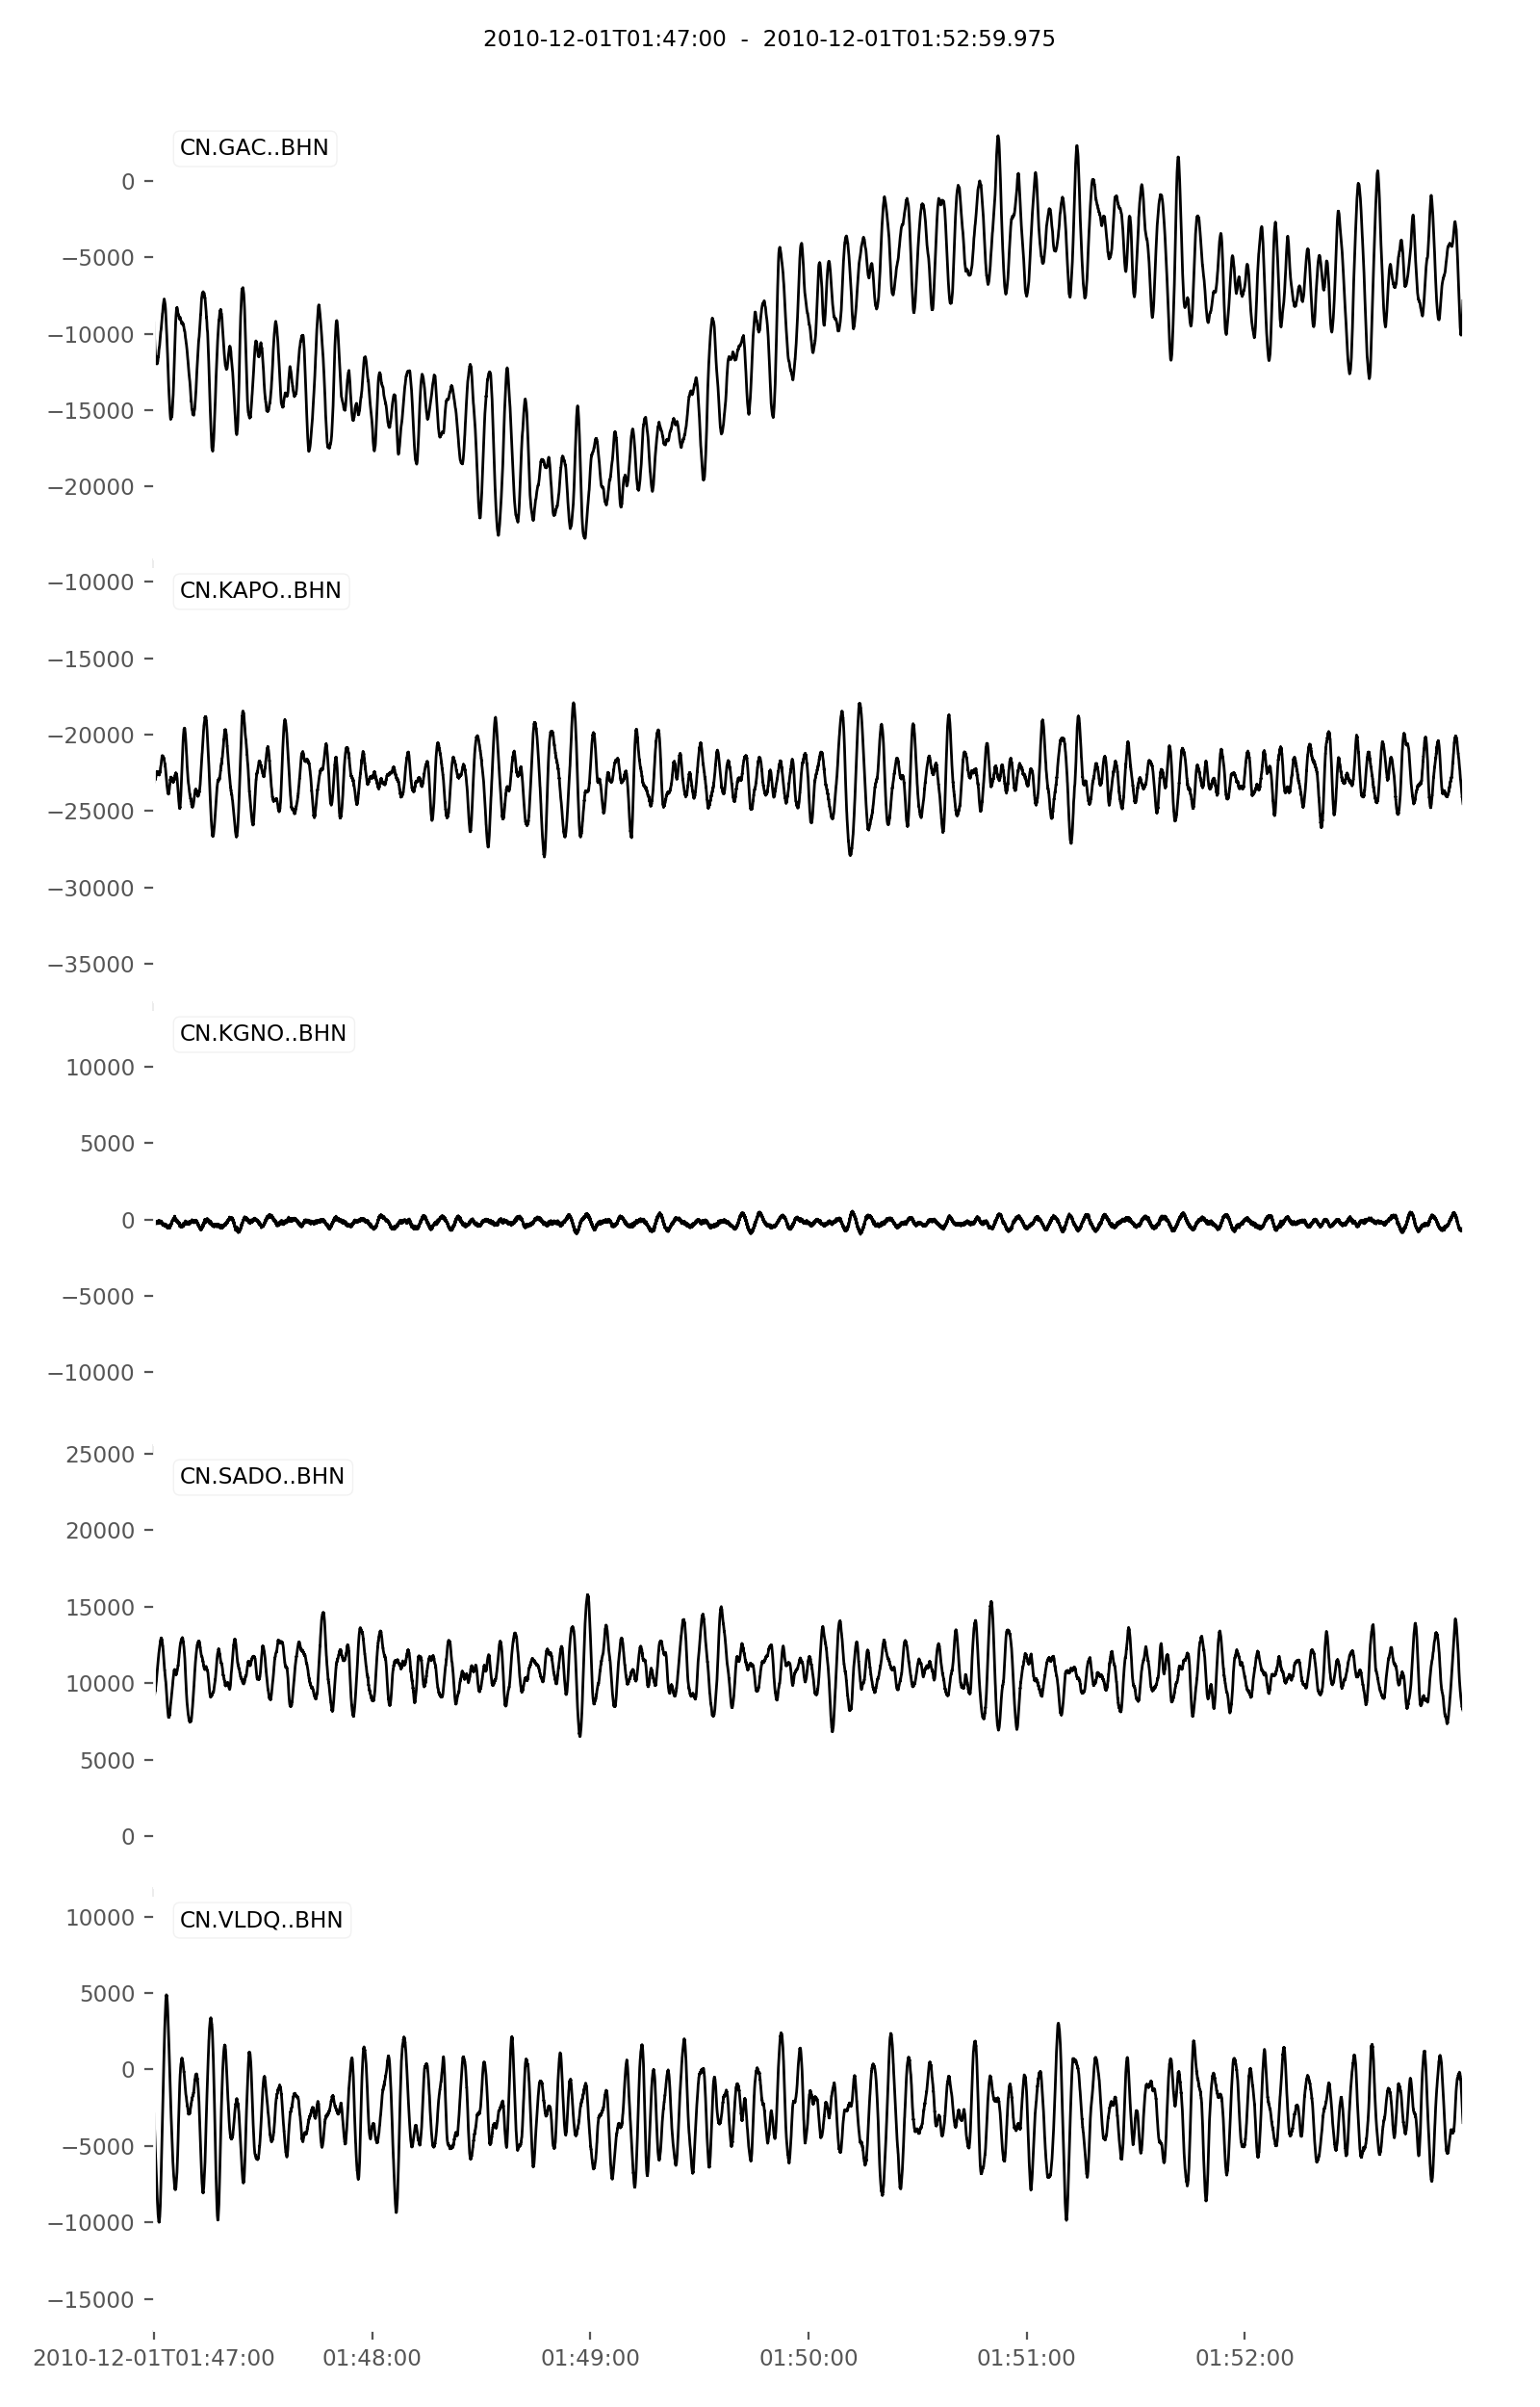

In [6]:
BHN_st[:5].plot()

In [8]:
print("Station: ", [tr.stats['station'] for tr in BHN_st])
print("Sampling Rate: ", [tr.stats['sampling_rate'] for tr in BHN_st])
print("(delta, npts): ", [(tr.stats['delta'], tr.stats['npts']) for tr in BHN_st])
print("(start time, end time): ", np.array([(tr.stats['starttime'], tr.stats['endtime']) for tr in BHN_st]))

Station:  ['VLDQ', 'SADO', 'GAC', 'KGNO', 'KAPO', 'LONY', 'MNTQ', 'FRNY', 'NCB', 'ERPA', 'BINY']
Sampling Rate:  [40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
(delta, npts):  [(0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400), (0.025, 14400)]
(start time, end time):  [[UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
  UTCDateTime(2010, 12, 1, 1, 52, 59, 975000)]
 [UTCDateTime(2010, 12, 1, 1, 47)
 

As expected, unlike the 'E' and the 'H' channels, the sampling rate of 'B' is 40Hz. This is consistent with the manual. 

In [9]:
BHN_stats = [(np.mean(tr.data), np.std(tr.data), (min(tr.data), max(tr.data))) for tr in BHN_st]
print("Mean\t\t\tStandard Deviation\tmin/max")
for s in BHN_stats:
    print(s[0], "\t\t", s[1], "\t\t", (s[2][0], s[2][1]))

Mean			Standard Deviation	min/max
-2806.84611111 		 2296.12456863 		 (-9988, 4885)
10802.8167361 		 1427.89077103 		 (6509, 15775)
-9909.85673611 		 5808.20099316 		 (-23375, 2945)
-207.670763889 		 244.971833711 		 (-977, 543)
-22842.9729861 		 1612.35434636 		 (-28003, -17916)
810.841875 		 399.924444162 		 (-445, 1952)
161.434027778 		 789.535165696 		 (-4194, 2818)
540.705416667 		 181.008341271 		 (-18, 1148)
-18389.2234028 		 689.677038765 		 (-20145, -16474)
829.852222222 		 223.142524137 		 (68, 1517)
1610.599375 		 1153.36224524 		 (-641, 4989)


In [10]:
around0 = obspy.core.stream.Stream()
notaround0 = obspy.core.stream.Stream()
for tr in BHN_st:
    if (abs(np.mean(tr.data))-np.std(tr.data)) < 0:
        around0.append(tr)
    else:
        notaround0.append(tr)
print(len(around0))
print(len(notaround0))

2
9


<IPython.core.display.Javascript object>


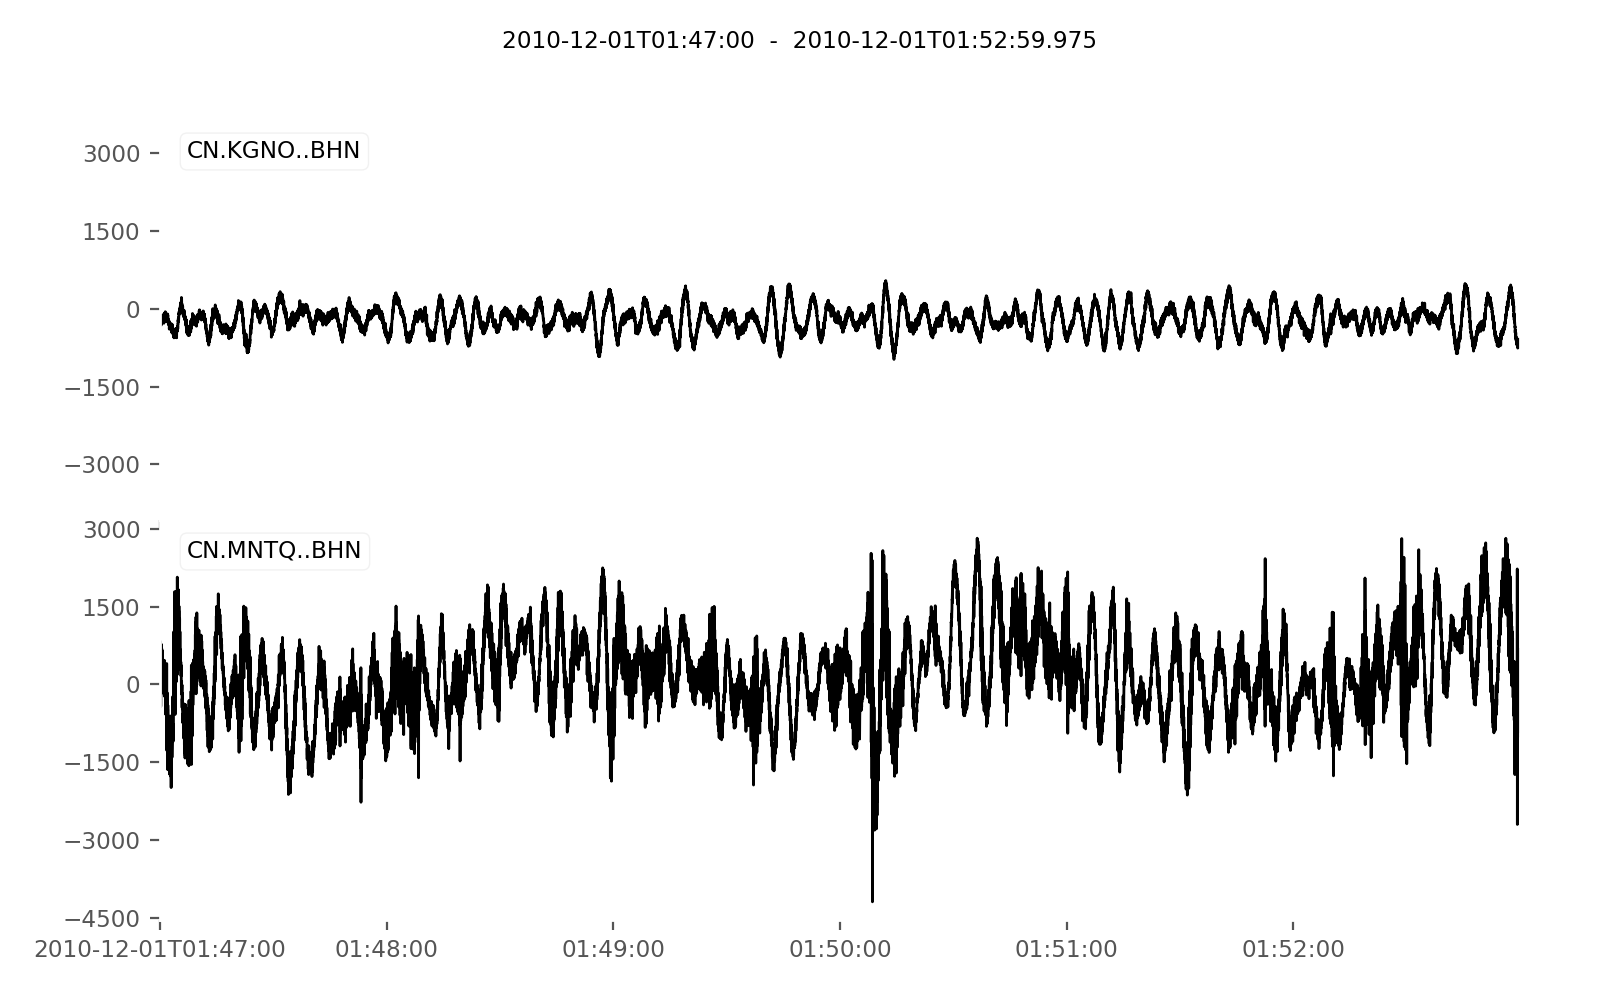

In [11]:
around0[:].plot()

<IPython.core.display.Javascript object>


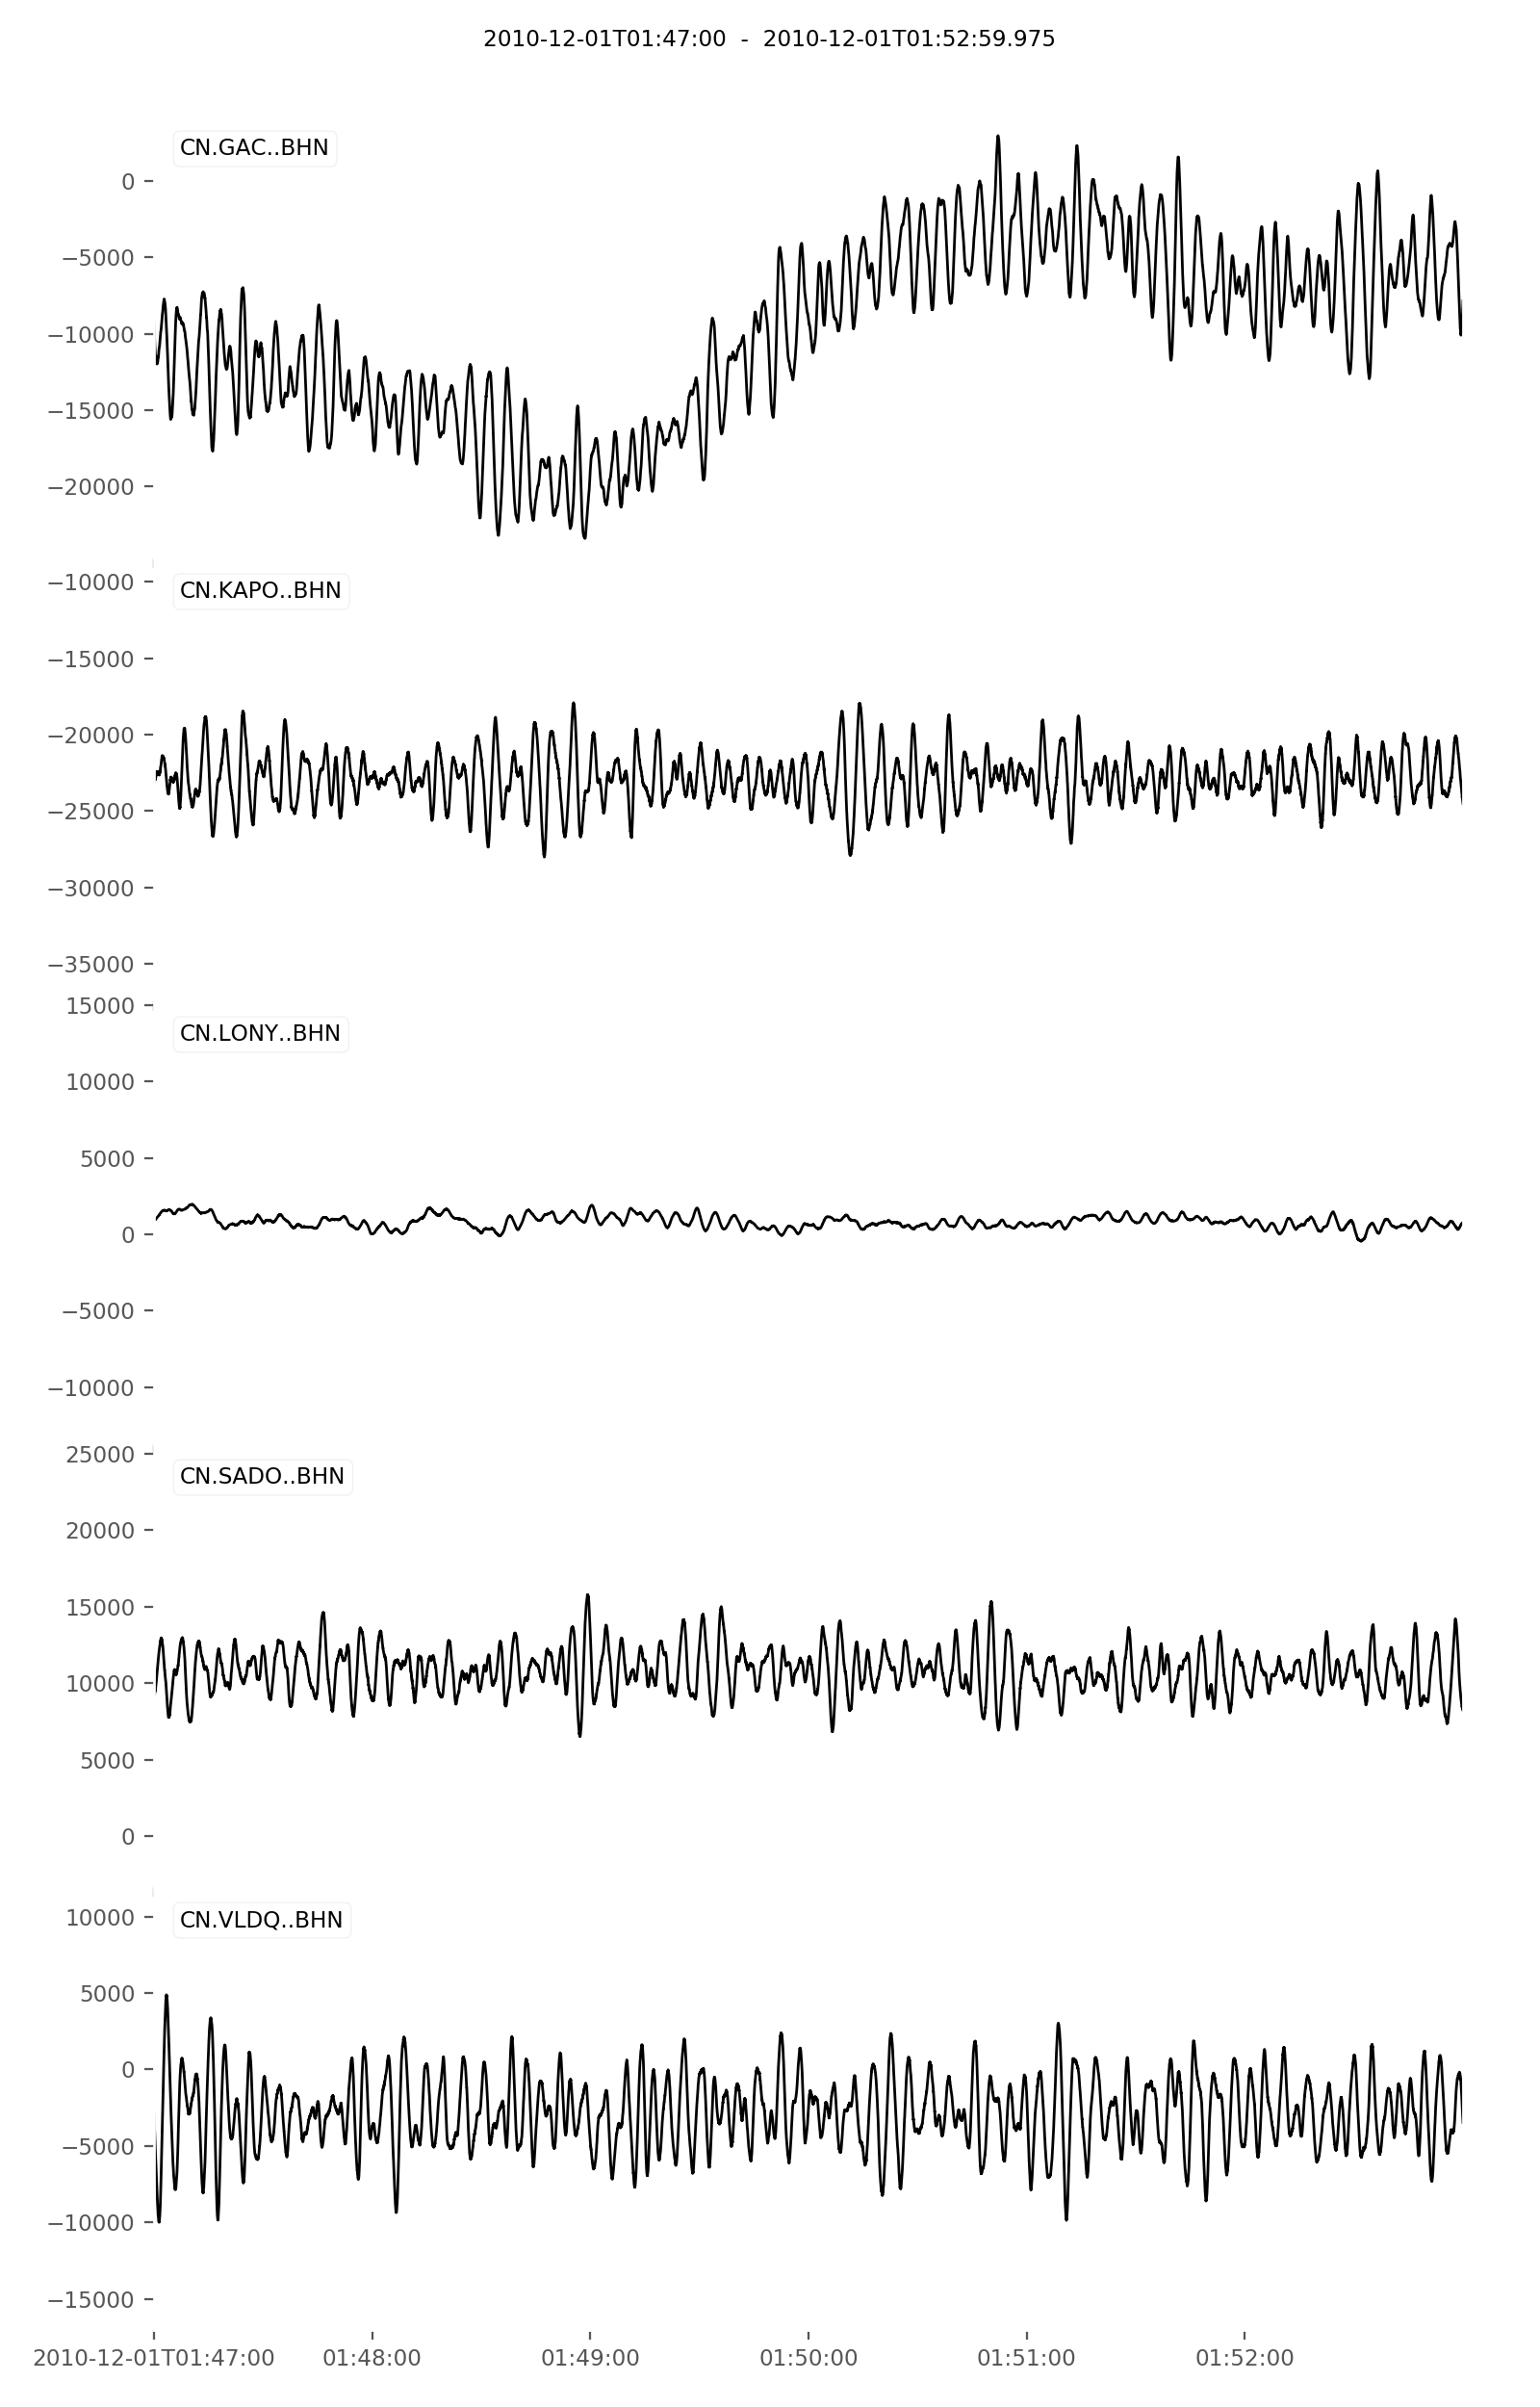

In [13]:
notaround0[:5].plot()